<a href="https://colab.research.google.com/github/mgfrantz/CTME-llm-lecture-resources/blob/main/prototyping_ai/01_getting_started_with_openai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making our first LLM API call



## Setup

In [ ]:
!pip install -Uqqqq openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.6/389.6 kB 6.7 MB/s eta 0:00:00


In [ ]:
# Imports
from rich import print

## Setting our `OPENAI_API_KEY` environment variable

When we use any LLM provider like OpenAI, Anthropic, or Google, we need some way to tell them who we are making the request.
Today, we'll be using OpenAI.
The most straightforward way to provide this key is through the environment variable `OPENAI_API_KEY`.
The OpenAI python client looks for this environment variable to use in authentication.

In the cell below, we load it from the Google Colab secrets manager on the left 👈.
Before runnign this code, make sure your API key is set as shown below:

![](https://github.com/mgfrantz/CTME-llm-lecture-resources/blob/main/images/colabSecrets.png?raw=true)

In [ ]:
# Set the OPENAI_API_KEY environment variable
from google.colab import userdata # import the environment variables from secrets
import os
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY') # Set the OPENAI_API_KEY environmnet variable

## Under the hood: `curl`

Almost all of the interactions we will have with LLMs are through API calls.
Below is one of the most low-level ways we can call an LLM, using the `curl` command.
This command gives us a lot of information about how the API request is structured.
We pass a JSON with an authorization header containing our `OPENAI_API_KEY`.
We also pass the model we want to call, the chat messages, and hyperparameters such as `temperature` that help control how text is generated.

In [ ]:
# Make the API call to OpenAI and store the response in test.json
!curl https://api.openai.com/v1/chat/completions \
  -H "Content-Type: application/json" \
  -H "Authorization: Bearer $OPENAI_API_KEY" \
  -d '{ \
     "model": "gpt-4o-mini", \
     "messages": [{"role": "user", "content": "Say: This is a test!"}], \
     "temperature": 0.7 \
    }' > test.json
# Show the output of test.json formatted nicely
!cat test.json | python -m json.tool

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   765  100   136    736    130  0:00:01  0:00:01 --:--:--   868
{
    "id": "chatcmpl-AR5Xfe2ByVqhgkp2vOmMmn7cFySE3",
    "object": "chat.completion",
    "created": 1731019523,
    "model": "gpt-4o-mini-2024-07-18",
    "choices": [
        {
            "index": 0,
            "message": {
                "role": "assistant",
                "content": "This is a test!",
                "refusal": null
            },
            "logprobs": null,
            "finish_reason": "stop"
        }
    ],
    "usage": {
        "prompt_tokens": 14,
        "completion_tokens": 5,
        "total_tokens": 19,
        "prompt_tokens_details": {
            "cached_tokens": 0,
            "audio_tokens": 0
        },
        "completion_tokens_details": {
            "reasoning_tokens": 0,
            "audio_tokens": 0,
    

## Using the OpenAI Python client

While the `curl` command shows us how the API call is made, it's not something that we can easily use in more complex applications.
One thing we can use is the OpenAI python client.
We can do the exact same thing, but the API call is a bit more abstracted from the developer.
Let's see how to perform the exact same API call using the OpenAI clinet 👇:

In [ ]:
from openai import OpenAI # import OpenAI
client = OpenAI() # Create the OpenAI client

In [ ]:
# Create the messages (same as above)
messages = [
    {"role": "user", "content": "Say: This is a test!"},
]

# Make the API call
chat_completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages,
    # stream=True
)

In [ ]:
# Display the output
print(chat_completion)

ChatCompletion(
    id='chatcmpl-AR5XhXKrhcOjmSEAddvKCcA6iFmaS',
    choices=[
        Choice(
            finish_reason='stop',
            index=0,
            logprobs=None,
            message=ChatCompletionMessage(
                content='This is a test!',
                refusal=None,
                role='assistant',
                audio=None,
                function_call=None,
                tool_calls=None
            )
        )
    ],
    created=1731019525,
    model='gpt-4o-mini-2024-07-18',
    object='chat.completion',
    service_tier=None,
    system_fingerprint='fp_0ba0d124f1',
    usage=CompletionUsage(
        completion_tokens=5,
        prompt_tokens=14,
        total_tokens=19,
        completion_tokens_details=CompletionTokensDetails(
            accepted_prediction_tokens=0,
            audio_tokens=0,
            reasoning_tokens=0,
            rejected_prediction_tokens=0
        ),
        prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)
    )
)

# Build our first chatbots

In this section, we'll go through several demos.
By the end of this section, you should be able to:
- Build a basic chatbot with the popular `gradio` Python library
- Understand key hyperparameters like `temperature`, `top_p`, and `top_k`
- Build an advanced chatbot with hyperparameter controls

## Exercise: Building a basic chatbot with `gradio`

User interfaces (UIs) are a great way to demo work in AI.
In the next several lessons, we will be using the `gradio` framework to demonstrate our growing skillset.
In this exercise, we will get a gentle introduction to creating chatbots with `gradio`.

Please follow the [ChatInterface](https://www.gradio.app/docs/gradio/chatinterface) documentation and the [Creating a chatbot fast](https://www.gradio.app/guides/creating-a-chatbot-fast) guide to make your first AI chatbot.
Your chatbot must:
- respond to messages

If this too easy, try to:
- add a system prompt
- use `stream=True` in your chat function

In [ ]:
!pip install -Uqqqq gradio gradio_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.8 MB/s eta 0:00:00


In [ ]:
import gradio as gr

In [ ]:
def chat(message, history):
    if not history:
        history = [
            {"role": "system", "content": "You are a helpful assistant who speaks like a pirate."},
        ]
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=history,
        stream=True,
    )
    partial_message = ""
    for chunk in response:
        if chunk.choices[0].delta.content is not None:
              partial_message = partial_message + chunk.choices[0].delta.content
              yield partial_message

In [ ]:
gr.ChatInterface(chat, type='messages').launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://af0474a55a92d45038.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Text generation hyperparameters

There are several hyperparameters we can play with that determine how text is generated.
For each token, the model outputs a score distribution over words, and that distribution is normalized using the softmax function to sum to 1.0.
We have several options to modify this probability distribution in ways that affect the way text is generated.

### `temperature`

The softmax function is shown below:

$$
\text{softmax}(p) = \frac{e^{x_i}}{\sum_{j=0}^ne^{x_j}}
$$

The softmax function is defined in python below:


In [ ]:
import numpy as np

def softmax(p):
    return np.exp(p) / np.sum(np.exp(p))

# Example usage
p = np.array([1, 2, 3, 4, 5])
print(softmax(p))

[0.01165623 0.03168492 0.08612854 0.23412166 0.63640865]

The `temperature` paramater allows us to make the most probable words more probable (temperature < 1) or less probable (temperature > 1) than vanilla softmax (temperature = 1).
The formula for softmax with temperature is show below:

$$
\text{softmax}(p, T) = \frac{e^{\frac{x_i}{T}}}{\sum_{j=0}^ne^{\frac{x_j}{T}}}
$$

All you do is divide everything by T before taking the exponent; larger values of $T$ flatten the distribution, while smaller values of $T$ skew the distribution towards the most probable tokens.

### Demo: Softmax with temperature

In [ ]:
# Softmax function with temperature parameter
def softmax_with_temperature(probs, temperature):
    exp_probs = np.exp(np.log(probs) / temperature)
    return exp_probs / np.sum(exp_probs)

In [ ]:
import matplotlib.pyplot as plt
from ipywidgets import interact

# Define a small probability distribution
probs = np.array([0.5, 0.3, 0.1, 0.05, 0.05])

# Plot the distribution with numbers on top of each bar
def plot_distribution(temperature):
    adjusted_probs = softmax_with_temperature(probs, temperature)
    plt.figure(figsize=(6, 4))
    bars = plt.bar(range(len(probs)), adjusted_probs, tick_label=['A', 'B', 'C', 'D', 'E'])
    plt.ylim(0, 1)
    plt.title(f'Softmax with Temperature = {temperature:.2f}')
    plt.ylabel('Probability')
    plt.xlabel('Tokens')

    # Add numbers on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

    plt.show()

# Interactive widget
interact(plot_distribution, temperature=(0.1, 2.0, 0.1));

interactive(children=(FloatSlider(value=1.0, description='temperature', max=2.0, min=0.1), Output()), _dom_cla…

### Demo: Alter the `temperature` parameter

In this demo, we generate several messages from the same prompt.
If we lower the temperature to 0, what do you notice about the results?
What if we raise it above 1.0?

In [ ]:
messages = [
    {"role": "user", "content": "Write a python function that reverses as tring. Tell a joke in the docstring!"},
]

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages,
    temperature=1.0, # change this number between 0 and 2 to see the outcome
    n=3 # generate 3 choices
)

NameError: name 'client' is not defined

In [ ]:
for choice in response.choices:
    print(choice.message.content)
    print('\n\n' + '='*50 + '\n')

### Demo: `top_k`

In top k sampling, we define the number of tokens we want to consider to sample from.
For example if `top_k = 3`, we will take the scores of the top 3 tokens and apply the softmax to only those 3 scores.
Run the code block below to see how `top_k` normalizes the scores at different values.

In [ ]:
# Define a small probability distribution
probs = np.array([0.5, 0.3, 0.1, 0.05, 0.05])

# Plot the distribution with numbers on top of each bar
def plot_top_k(top_k):
    ticks = ['A', 'B', 'C', 'D', 'E']
    sorted_probs = np.sort(probs)[::-1]
    top_k_probs = sorted_probs[:top_k]
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    adjusted_probs = softmax(probs)
    ax = axes[0]
    bars = ax.bar(range(len(probs)), adjusted_probs, tick_label=ticks)
    ax.set_ylim(0, 1)
    ax.set_title('Original Probabilities')
    ax.set_ylabel('Probability')
    ax.set_xlabel('Token')

    # Add numbers on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

    ax = axes[1]
    if top_k < len(probs):
        updated_probs = softmax(probs[:top_k])
        bars = ax.bar(range(top_k), updated_probs, tick_label=ticks[:top_k])
    else:
        bars = ax.bar(range(len(probs)), softmax(probs), tick_label=ticks)
    ax.set_ylim(0, 1)
    ax.set_title(f'Top {top_k} Probabilities')
    ax.set_ylabel('Probability')
    ax.set_xlabel('Token')
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

    plt.show()

# Interactive widget
interact(plot_top_k, top_k=(1, len(probs), 1));

### Demo: `top_p` (aka nucleus sampling)

`top_p` is similar to `top_k`, but instead of defining the number of tokens to consider, you define a cutoff for cumulative probability.
For example, if you have a top_p of 0.6 and score of ('cat', 0.4), ('dog', 0.15), ('llama', 0.1), and ('parakeet', 0.01), you would cut only consider 'cat', 'dog', and 'llama' because 0.4 + 0.15 is less than 0.6, but 0.4 + 0.15 + 0.1 is greater.
Because you have a probability cutoff instead of number of tokens, this may mean you have different numbers of tokens considered at each decoding step.

Play around with the `top_p` slider below 👇 to get some intuition for how it works.

In [ ]:
# Define a small probability distribution (can simulate a language model's logits)
probs = np.array([0.4, 0.2, 0.15, 0.1, 0.08, 0.05, 0.02])

# Function to apply top-p filtering with a minimum of one token selected
def top_p_filter(probs, p):
    sorted_probs = np.sort(probs)[::-1]
    cumulative_probs = np.cumsum(sorted_probs)

    # Ensure at least one token is selected
    if p < sorted_probs[0]:
        cutoff = 1
    else:
        cutoff = np.argmax(cumulative_probs >= p) + 1

    filtered_probs = sorted_probs[:cutoff]
    return filtered_probs, cutoff

# Plot the distribution with top-p filtering
def plot_top_p(p):
    filtered_probs, cutoff = top_p_filter(probs, p)
    normalized_probs = filtered_probs / np.sum(filtered_probs)  # Normalize the selected probabilities

    # Create two subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

    # Plot 1: Original distribution with top-p filtering
    bars1 = axs[0].bar(range(len(probs)), np.sort(probs)[::-1], tick_label=labels)
    axs[0].set_ylim(0, 1)
    axs[0].set_title(f'Top-p Sampling (p = {p:.2f}) - Original Probabilities')
    axs[0].set_ylabel('Probability')
    axs[0].set_xlabel('Tokens')

    # Highlight selected and unselected probabilities
    for i, bar in enumerate(bars1):
        if i >= cutoff:
            bar.set_color('gray')  # Color the bars outside top-p as gray
        else:
            bar.set_color('blue')  # Highlight the selected probabilities

    # Add numbers on top of each bar for original distribution
    for bar in bars1:
        yval = bar.get_height()
        axs[0].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

    # Plot 2: Normalized probabilities of the selected tokens
    bars2 = axs[1].bar(range(len(filtered_probs)), normalized_probs, tick_label=labels[:len(filtered_probs)])
    axs[1].set_ylim(0, 1)
    axs[1].set_title(f'Normalized Probabilities of Selected Tokens (p = {p:.2f})')
    axs[1].set_ylabel('Normalized Probability')
    axs[1].set_xlabel('Selected Tokens')

    # Add numbers on top of each bar for normalized probabilities
    for bar in bars2:
        yval = bar.get_height()
        axs[1].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Interactive widget
interact(plot_top_p, p=(0.01, 1.0, 0.05));

## Exercise: Advanced chatbot with hyperparameter controls

Now that you've learned about roles and generation hyperparameters, let's create a new chatbot that allows you to contol at them.
Your chatbot must:
- allow for control of at least 1 generation hyperparameter (ex: `temperature`)
- allow for user input of a system message

If this is too easy, try to:
- allow for control over `temperature` and `top_p`
- improve the UI by putting all the controls in a sidebar
- have a `Clear` button that restarts the conversation
- add documentation with markdown
- implement streaming responses

In [ ]:
def user(message:str, history:list, system_message:str):
    if not history and system_message:
        history.append(
            {"role": "system", "content": system_message},
        )
    # Append the user's message to the conversation history
    history.append({"role": "user", "content": message})
    return "", history

def bot(history, temperature, top_p):
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=history,
        temperature=temperature,
        top_p=top_p,
        stream=True,
    )
    history.append({"role": "assistant", "content": ""})
    for chunk in response:
        if chunk.choices[0].delta.content is not None:
              history[-1]['content'] += chunk.choices[0].delta.content
              yield history

def clear():
    return "", []

In [ ]:
with gr.Blocks() as demo:
    with gr.Row():
        with gr.Column(scale=1):
            temperature = gr.Slider(minimum=0, maximum=1, value=0.7, label="Temperature")
            top_p = gr.Slider(minimum=0, maximum=1, value=1, label="Top p")
            system_message = gr.Textbox(label="System message", value="You are a helpful assistant who speaks like a pirate.")
            clear_button = gr.Button("Clear messages")
        with gr.Column(scale=3):
            chatbot = gr.Chatbot(type='messages')
            input = gr.Textbox(label="Message", value="")
            input.submit(user, [input, chatbot, system_message], [input, chatbot]).then(
                bot, [chatbot, temperature, top_p], chatbot
            )
            clear_button.click(clear, [], [input, chatbot])

demo.launch()



Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://944325f63036d61359.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Prompt engineering 1: zero-shot prompting

To really benchmark how each of these techniques do, we need a baseline.
We will use zero-shot prompting to get a base level of performance on our task.

So far, we've been using the low-level `openai` library.
However, there are several very competent higher-level libraries that provide great abstractions such as `langchain` and `llama-index`.
Today, we'll be using `llama-index` to make our LLM calls a bit easier.

In [ ]:
!pip install -qqqq datasets llama-index llama-index-llms-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.8/176.8 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currentl

## Prepare our dataset

In [ ]:
from datasets import load_dataset, Dataset

In [ ]:
ds = load_dataset('SetFit/amazon_reviews_multi_en')

In [ ]:
train_samples_per_class = 25
eval_test_samples_per_class = 5
train = Dataset.from_pandas(ds['train'].to_pandas().groupby('label').sample(train_samples_per_class).reset_index(drop=True))
valid = Dataset.from_pandas(ds['validation'].to_pandas().groupby('label').sample(eval_test_samples_per_class).reset_index(drop=True))
test = Dataset.from_pandas(ds['test'].to_pandas().groupby('label').sample(eval_test_samples_per_class).reset_index(drop=True))

In [ ]:
train.to_pandas().head(3)

,id,text,label,label_text
0,en_0725819,Never received can I get refunded on a gift card,0,0
1,en_0502930,These items were badly warped. I tried to stra...,0,0
2,en_0237275,No!!! I still haven’t received this item!!!,0,0


## Zero-shot prompt

In [ ]:
from llama_index.core.schema import TextNode
from llama_index.core import PromptTemplate
from llama_index.core.prompts import ChatMessage
from llama_index.llms.openai import OpenAI
from pydantic import BaseModel, Field
from IPython.display import display
import asyncio

In [ ]:
prompt_tmpl_str = """\
The review text is below.
---------------------
{review}
---------------------
Given the review text and not prior knowledge, \
please attempt to predict the review score of the context.

Query: What is the rating of this review?
Answer: \
"""

prompt_tmpl = PromptTemplate(
    prompt_tmpl_str,
)

In [ ]:
class Rating(BaseModel):
    rating: int = Field(..., description="Rating of the review", enum=[0, 1, 2, 3, 4])

llm = OpenAI(model="gpt-4o-mini")
zero_shot_structured_llm = llm.as_structured_llm(Rating)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, cohen_kappa_score, mean_absolute_error

async def predict_and_evaluate(predict_fn):
    labels = [int(x) for x in valid['label']]
    tasks = [
        predict_fn(text)
        for text in valid['text']
    ]
    predictions = await asyncio.gather(*tasks)
    cm = ConfusionMatrixDisplay.from_predictions(labels, predictions, normalize='true')
    cr = classification_report(labels, predictions)
    kappa = cohen_kappa_score(labels, predictions, weights='quadratic')
    mae = mean_absolute_error(labels, predictions)
    return labels, predictions, kappa, mae, cm, cr

In [ ]:
async def zero_shot_predict(text):
    messages = [
        ChatMessage.from_str(prompt_tmpl.format(review=text))
    ]
    response = await zero_shot_structured_llm.achat(messages)
    return response.raw.rating

Cohen's Kappa: 0.8364, MAE: 0.56

precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.50      0.80      0.62         5
           2       0.00      0.00      0.00         5
           3       0.50      0.40      0.44         5
           4       0.50      1.00      0.67         5

    accuracy                           0.52        25
   macro avg       0.50      0.52      0.46        25
weighted avg       0.50      0.52      0.46        25

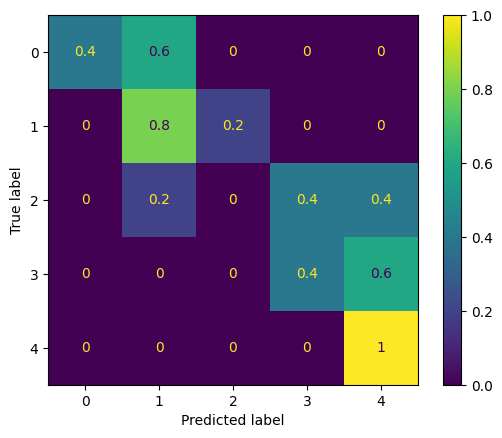

In [ ]:
zero_shot_labels, zero_shot_predictions, zero_shot_kappa, zero_shot_mae, zero_shot_cm, zero_shot_cr = await predict_and_evaluate(zero_shot_predict)
print(f"Cohen's Kappa: {zero_shot_kappa:.04f}, MAE: {zero_shot_mae}")
print(zero_shot_cr)

# Prompt engineering 2: few-shot promting

In the following cell, we load and parse the data.
The data here is uber reviews

In [ ]:
train.shuffle()[:5]

{'id': ['en_0229331', 'en_0067389', 'en_0945335', 'en_0539354', 'en_0156256'],
 'text': ["These bowls are awesome for the price. They have a good solid weight to them and don't feel like they are going to break when i set them down on my granite counters. The depth and width are almost perfect.",
  'Enjoyed the layout better in this one has spaces for seating charts, field trips, birthdays and more.',
  'I hand craft stationery and these stickers are perfect for making monograms with. They stick on nice and secure and the edges are clear, not white paper.',
  'Great mat a bit squeaky when using for hot yoga on the floor, but it still gets 5 stars in my book.',
  'My daughter participates in a school outing.I bought her this thermal underwear to keep her warm in the cold outdoors.Not only are they warm, but they are comfortable and elastic against her skin.They are thin enough for her to wear them at all times'],
 'label': [3, 2, 4, 4, 4],
 'label_text': ['3', '2', '4', '4', '4']}

In [ ]:
def random_few_shot_examples_fn(**kwargs):
    random_examples = train.shuffle()[:5]
    result_strs = []
    for text, rating in zip(random_examples['text'], random_examples['label']):
        result_strs.append(f"Text: {text}\nRating: {rating}")
    return "\n\n".join(result_strs)

In [ ]:
print(random_few_shot_examples_fn())

Text: These are the thinnest, smallest bully sticks I’ve ever kid eyes on. I didn’t even know they could be made 
this small. It looks like I’m holding a pack on incense in the picture. My pup finished one in under three minutes 
when it usually takes him about 20 - 35 minutes to get through a normal sized bully stick. All in all, dog loved 
it, so I give them an extra star. If you have a very small dog like a chihuahua or even a puppy, these might work 
out, but this isn’t a very good value for the price for anyone else.
Rating: 1

Text: Nice bags. Wished they had a white area to write on. Ended up switching to lansinoh.
Rating: 3

Text: Bigger than expected. Awkward even. Too ... Plastic. Thinner than a gal. of milk. Should at least have some 
sort of a handle to make up for its awkwardness.
Rating: 2

Text: This product does work, however, even after reading the instructions, my patchwork wasn't the greatest. I 
recommend that if you are using this on matte finished leather or faux leather products that you use very little of
the glue and definitely make sure that your glue is completely dry and that you smooth out the surface. There is a 
definite difference in sheen when applying the paint colour to your item that needs repair. In essence, this 
product does patch tears, but it still is very noticeable.
Rating: 2

Text: Didn’t like these. The khaki colored pants are see-through and the fabric is very rough. Although they may 
soften with washing, I’m returning.
Rating: 0

In [ ]:
few_shot_prompt_tmpl_str = """\
The review text is below.
---------------------
{review}
---------------------
Given the review text and not prior knowledge, \
please attempt to predict the review score of the context. \
Here are several examples of reviews and their ratings:

{random_few_shot_examples}

Query: What is the rating of this review?
Answer: \
"""

few_shot_prompt_tmpl = PromptTemplate(
    few_shot_prompt_tmpl_str,
    function_mappings={"random_few_shot_examples": random_few_shot_examples_fn},
)

In [ ]:
print(few_shot_prompt_tmpl.format(review='I loved this product!'))

The review text is below.
---------------------
I loved this product!
---------------------
Given the review text and not prior knowledge, please attempt to predict the review score of the context. Here are 
several examples of reviews and their ratings:

Text: First, these do not cycle well from magazines in either pistols or rifles. They may even damage feed lips on 
mags. Therefore, these are worthless for a training aid. Second, they are brittle and have a limited life span. The
only use for these would be for function testing since you can see a notch cut out in the cap after firing it so 
you can see if your firing pin is working.
Rating: 1

Text: First I want to state that the hot tub itself is awesome. The lights are awesome and it runs off a regular 
electrical outlet. Two major problems that I have with this. Number one is the controls are hard to figure out. 
Even after reading the manual it still gets confusing with all the different types of mode plus there are things 
you figure out along the way as to why your hot tub isn't heating up, trying to find the correct setting on how 
many people will be in it to how much it is going to be used, need to really read up on chemicals that need to be 
in it and where to buy those along with the filters. this hot tub does get on stuck mode quite a bit. You have to 
be careful changing the different modes on it because if your temp is too high it may think it needs to be heated 
if your temperature setting is on low. For example, you have it set for 98 degrees but then you decide that you 
want it cooler to 95. If you are in economy mode and it is over 95 degrees then the hot tub will run non stop no 
matter what setting or filteration setting it is on. The main issue I have with this hot tub is the Hudson Bay 
customer service. I was on the phone with them for a total of a week trying to figure out why my hot tub was not 
turning off and why some of my jets were not working. I fear that if I ever have to order parts and have them 
installed it just will not happen with this company. I kept asking for someone to come out and look at it but I 
kept getting the run around. As for ordering any parts of the company I was told by the service department that I 
would be better off buying my parts such as chemicals and filters from someplace else because they were way to 
expensive and shipping time can be as long as a month after I placed my order. I was finally able to talk to 
someone in the service department that was able to explain to me how to fix stuff and to check stuff but it took me
a forever to find him. Average length of phone call was 3 hours where they just kept telling me to do the same 
thing over and over again. Very frusterating. So if you do not need customer service at all then feel free to buy 
this hot tub.
Rating: 3

Text: Looks like it is a remnant
Rating: 1

Text: I purchased this item. I really doubt that it is RFID blocking though, since it looks like most other pouch 
type holders. But just to be safe on that, I went ahead and purchased the RFID blocking sleeves to put our 
passports into. This item holds a good deal, although its not super big. Rather thinly made too.
Rating: 3

Text: Overall, good build quality, works as a bike pump, and I like the general design. However, it has several 
minuses that, while individually were just annoyances, cumulatively added up to be a deal killer: - It's single 
action, so it takes about twice as many strokes to inflate a tire. - The handle doesn't lock when not in use, so 
you have to secure it tightly to keep it from extending while stored and getting full of crud. - When I checked the
pressure gauge against a decent automotive one, the reading was 5 psi low. Not a lot, but when you're shooting for 
25 psi, that's a 20% error. - The presta side of the adapter hose does not depress the end of the presta valves on 
my tires, so the pressure gauge is useless for me anyway. - The strap that came with it was flimsy, 

In [ ]:
class Rating(BaseModel):
    rating: int = Field(..., description="Rating of the review", enum=[0, 1, 2, 3, 4])

llm = OpenAI(model="gpt-4o-mini")
rand_few_shot_structured_llm = llm.as_structured_llm(Rating)

In [ ]:
async def random_few_shot_predict(text):
    messages = [
        ChatMessage.from_str(prompt_tmpl.format(review=text))
    ]
    response = await rand_few_shot_structured_llm.achat(messages)
    return response.raw.rating

Cohen's Kappa: 0.8496, MAE: 0.52

precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.57      0.80      0.67         5
           2       0.00      0.00      0.00         5
           3       0.50      0.40      0.44         5
           4       0.50      1.00      0.67         5

    accuracy                           0.56        25
   macro avg       0.51      0.56      0.51        25
weighted avg       0.51      0.56      0.51        25

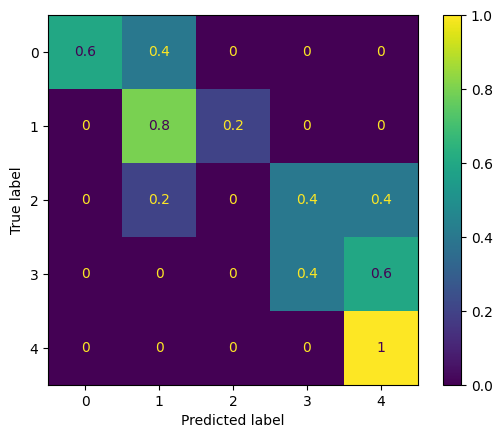

In [ ]:
random_few_shot_labels, random_few_shot_predictions, random_few_shot_kappa, random_few_shot_mae, random_few_shot_cm, random_few_shot_cr = await predict_and_evaluate(random_few_shot_predict)
print(f"Cohen's Kappa: {random_few_shot_kappa:.04f}, MAE: {random_few_shot_mae}")
print(random_few_shot_cr)

# Demo: Embeddings and vector stores

In the previous demonstration, we saw that providing several randomly-selected examples to the LLM at inference time does decently well - it's decently good at predicting the review score, especially within 1 point of the actual review.
In a little bit, we'll see that providing better examples to the model at inference time helps improve these scores.
But we need efficient ways of searching over our `train` examples to determine which one to use.

This is when you want to use a vector store.
Vector stores can be in-memory stors, on-disk stores, database extensions like pgvector for Postgres, or even external APIs like Pinecone.

Today, we'll use a popular open-source vectore database called `chromadb`.
This tool allows us to ingest our documents and search over them effectively to determine which examples to use.

In this demo, we'll go over the basics of how to use ChromaDB.
We will also use `sentence-transformers` for embeddings as an example of how to use open-weights embedding models.

In [ ]:
# Install chromadb and sentence-transformers
!pip install -qqqq chromadb sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 1.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 kB 417.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 480.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 677.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 293.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 479.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 338.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 451.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 337.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.2/159.2 kB 370.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 338.6 

In [ ]:
# Imports
from sentence_transformers import SentenceTransformer
from chromadb import Client
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In this cell, we declare our embedding function.
We will use the small but powerful [BGE-small](https://huggingface.co/BAAI/bge-small-en-v1.5) model to embed our documents.

In [ ]:
embed_fn = SentenceTransformerEmbeddingFunction('BAAI/bge-small-en-v1.5')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Next, we can create our `chromadb` client and use it to create our collection (think table).
Notice that we pass our embedding function.
That way, when we add documents to the table, the the text is automatically embedded.

In [ ]:
client = Client()

In [ ]:
reviews = client.create_collection(
    name='reviews',
    embedding_function=embed_fn,
    get_or_create=True
)

In [ ]:
reviews.add(documents=train['text'], metadatas=[{'rating': x} for x in train['label']], ids=train['id'])

Once we have created our vector store, we can search over it using plain text.
Here are 3 queries - good review, a neutral review, and a bad review.
Let's search our train documents and observe the average rating for the closest 5 documents to each fake review.

In [ ]:
queries = [
    "This product is great!",
    "This product was pretty typical - not good or bad.",
    "This product was awful",
]

In [ ]:
retrievals = reviews.query(
    query_texts=queries,
    n_results=5
)

In [ ]:
for query, metadatas in zip(queries, retrievals['metadatas']):
    ratings = [float(i.get('rating')) for i in metadatas]
    print(f"Review {query}")
    print(f"Avg rating of retrieved passages: {np.mean(ratings)}")

Review This product is great!

Avg rating of retrieved passages: 4.0

Review This product was pretty typical - not good or bad.

Avg rating of retrieved passages: 1.4

Review This product was awful

Avg rating of retrieved passages: 0.6

In [ ]:
reviews.query(query_texts = 'hello!')['documents']

[['Timely arrival and as advertised!',
  "Ask the Organizer covers a lot of ground and is great for stimulating thinking about how my space could be improved. Here's the thing I liked best - she uses links to specific Pinterest pages for each area of the house. And it's great! I read it on my iPhone with the free Kindle App, and I could click on the Pinterest link and come right back. Yeah. It includes so much - some of which doesn't apply to me, but might apply to you - garage management, children organizing, time management, etc. etc. Altogether a great resource, conversational, inspiring, down-to-earth. Through it, the author's good spirit shines through, and motivates me.",
  'Product is what I wanted',
  'Really nice durable case. The actual ring is hard to move at first, but after a few times it wasn’t difficult. I love the magnet feature. It pairs great with the magnetic dock I have for the car vent!',
  'I was happy with this purchase. Nursing friendly and cute! I got a medium,

## Discussion: Using vector stores

Now that we have our data encoded this way, can anyone tell me how we might use this object to improve the way we classify reviews?

# Prompt engineering 3: dynamic few-shot prompting

In [ ]:
def dynamic_few_shot_examples_fn(**kwargs):
    retrievals = reviews.query(
        query_texts=[kwargs['review']],
        n_results=5
    )
    result_strs = []
    documents = retrievals['documents'][0]
    metadatas = retrievals['metadatas'][0]
    for document, metadata in zip(documents, metadatas):
        result_strs.append(f"Text: {document}\nRating: {metadata.get('rating')}")
    return "\n\n".join(result_strs)

In [ ]:
print(dynamic_few_shot_examples_fn(review="This is the best uber ride of my life!"))

Text: Very well built. Over 800 pounds riding on them and doesnt change mobility. Great price.
Rating: 4

Text: Really nice durable case. The actual ring is hard to move at first, but after a few times it wasn’t 
difficult. I love the magnet feature. It pairs great with the magnetic dock I have for the car vent!
Rating: 4

Text: Love it! The vibration is a great feature, as well as the free little bottle of lube. My suction cup isn't 
the greatest, but it works. Customer service is the best, Amira was very helpful.
Rating: 3

Text: Pretty Fun And Relaxing
Rating: 3

Text: My cousin ask me to buy it for him since I have amazon Prime. I got it on the second day, it ships super fast
. last week, my cousin got his new iphone 11 and this case fits his phone perfectly, it is light and flexible. it 
has simple design which is good for business man, but it can prevent breaking the phone.
Rating: 4

In [ ]:
dynamic_few_shot_prompt_tmpl_str = """\
The review text is below.
---------------------
{review}
---------------------
Given the review text and not prior knowledge, \
please attempt to predict the review score of the context. \
Here are several examples of reviews and their ratings:

{dynamic_few_shot_examples}

Query: What is the rating of this review?
Answer: \
"""

dynamic_few_shot_prompt_tmpl = PromptTemplate(
    few_shot_prompt_tmpl_str,
    function_mappings={"dynamic_few_shot_examples": dynamic_few_shot_examples_fn},
)

In [ ]:
async def dynamic_few_shot_predict(text):
    messages = [
        ChatMessage.from_str(few_shot_prompt_tmpl.format(review=text))
    ]
    response = await zero_shot_structured_llm.achat(messages)
    return response.raw.rating

Cohen's Kappa: 0.8868, MAE: 0.4

precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.67      0.80      0.73         5
           2       0.50      0.20      0.29         5
           3       0.50      0.60      0.55         5
           4       0.62      1.00      0.77         5

    accuracy                           0.64        25
   macro avg       0.66      0.64      0.62        25
weighted avg       0.66      0.64      0.62        25

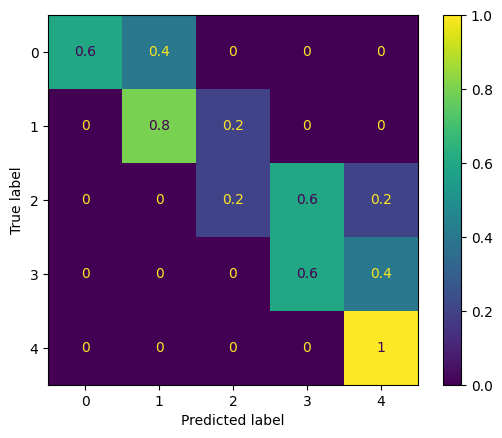

In [ ]:
dynamic_few_shot_labels, dynamic_few_shot_predictions, dynamic_few_shot_kappa, dynamic_few_shot_mae, dynamic_few_shot_cm, dynamic_few_shot_cr = await predict_and_evaluate(dynamic_few_shot_predict)
print(f"Cohen's Kappa: {dynamic_few_shot_kappa:.04f}, MAE: {dynamic_few_shot_mae}")
print(dynamic_few_shot_cr)

# Exercise: Rating Reviews

In today's session, we've learned about:
- Chat models, interfaces, and `gradio`
- Zero shot prompting
- Few shot learning
- Embeddings and vector stores
- Dynamic few shot learning

It's time to combine these principles into our final exercise of the day.
Your task is to create a `gradio` app where a user can paste a review from Amazon and the app displays the predicted number of ⭐stars⭐.
To complete this task, please:
- Create a GradIO app with...
  - an input field where a user can submit text
  - a submit button and/or functionality to submit the text to the app when the user hits the return key
  - an output field to display the predicted result

If this is too easy, try to:
- Add hyperparameters like the number of examples retrieved
- Add details in markdown for how to use the app
- Set up a Gemini API key and use [`llama-index-llms-gemini`](https://docs.llamaindex.ai/en/stable/examples/llm/gemini/) to give users an option to use a different LLM API

